# Ciência dos Dados - Projeto 2

##### André Ejz, Elisa Malzoni, Leonardo Andrade e Michel Becker
____

## Teste A/B

#### Sobre o projeto:
Neste projeto o grupo realizará um teste A/B, comparando duas versões diferentes de um mesmo portifólio de projetos criado na matéria Co-design de Aplicativos. 
A tarefa que cada usuário deverá desempenhar é encontrar e entrar na página do projeto "Estação Meteorológica", em qualquer umas das versões do site à qual ele for redirecionado.
As duas versões do site têm exatamente o mesmo design e variam apenas na localização do projeto o qual os usuários deverão encontrar.

#### Descrição da técnica inferencial adotada:

Para o teste A/B serão recolhidas duas amostras diferentes do tempo gasto pelos usuários para encontrar o projeto "Estação Meteorológica". Uma amostra corresponderá à versão A do site e a outra à versão B. Como deseja-se avaliar a diferença entre as performances das duas versões, ou seja, a diferença no tempo médio para se realizar a tarefa em cada versão, criamos duas hipóteses: ou as médias delas são iguais ou elas são diferentes. 

Como estamos trabalhando simultaneamente com duas diferentes amostras, obteremos duas distribuições normais para as médias amostrais, que terão que ser combinadas de forma linear. Após calcularmos as médias estimadas para cada amostra obtida, deveremos realizar um teste de hipótese que nos permita rejeitar ou não a hipótese nula criada. 

Entretanto, as esperanças do tempo das versões A e B são ambas desconhecidas, bem como suas variâncias, o que dificulta a análise. Uma descrição mais detalhada das etapas realizadas para a análise inferencial será fornecida a seguir.
____

## Etapas da análise inferencial:


#### Primeira etapa - construção das hipóteses:

Com o teste A/B obteremos duas amostras correspondentes às duas diferentes versões do site. A análise que deseja-se fazer é a seguinte: de que forma a alteração da localização do projeto "Estação Meteorológica" altera o tempo médio gasto pelos usuários para encontrá-lo. A partir disso, podemos construir as seguintes hipóteses: se não houver alteração, temos que $H_0: E(A) - E(B) = 0$, enquanto que se houver alteração, $H_1: E(A) - E(B) \neq 0$. 

Com as hipóteses já formuladas, o próximo passo será construir a distribuição amostral que combine linearmente as distribuições amostrais de A e de B. Dessa forma, teremos a distribuição que nos permitirá realizar o teste de hipótese para rejeitar ou não $H_0$.

#### Segunda etapa - construção da distribuição amostral:

Tanto $X_A$ quanto $X_B$ são variáveis aleatórias que seguem uma distribuição normal, cujas médias e variâncias são desconhecidas. Como deveremos trabalhar simultaneamente com as duas distribuições elas deverão ser combinadas linearmente. Assim, tomando $H_0$ como base, temos que $X_A - X_B$ ~ $N(E,Var)$.

Utilizando as propriedades de Esperança e Variância podemos calcular $E$ e $Var$ de $X_A - X_B$:

* $E = E(X_A - X_B) = E(X_A) - E(X_B)$


* $Var = Var(X_A - X_B) = Var(X_A) + Var(X_B)$, já que $X_A$ e $X_B$ são variáveis aleatórias independentes.

Tomando novamente $H_0$ como base, percebe-se que $E = 0$ e $X_A - X_B$ ~ $N(0,Var)$. Como as variâncias de A e B continuam sendo desconhecidas elas deverão ser estimadas, o que nos levará a uma distribuição t no lugar de uma distribuição normal para a padronização de $X_A - X_B$.

#### Terceira etapa - estimando a variância e obtendo a distribuição t:

Teoricamente, o valor de $Var$, a variância da distribuição amostral $X_A - X_B$, é definido por:
* $\frac{\sigma_A^2}{nA} + \frac{\sigma_B^2}{nB} $

Entretanto, os valores de $\sigma_A$ e $\sigma_B$ são desconhecidos, o que nos obriga a estimá-los. Dessa forma, obtemos, a partir de nossos dados amostrais A e B, as variâncias estimadas $S_A$ e $S_B$. Como ambas as estimativas carregam um erro consigo, torna-se incoerente utilizar uma Normal para a padronização da distribuição $X_A - X_B$ e, portanto recorre-se a uma distribuição t.

#### Quarta etapa - definindo a Região Crítica:

Após a construção da distribuição t de $X_A - X_B$, uma região crítica será definida para que possamos avaliar a validade de $H_0$. Adotando-se um alfa igual a 5% o intervalo correspondente a essa região é calculado e comparado ao valor observado de $X_A - X_B$ obtido a partir dos dados amostrais de A e B. Em seguida, rejeita-se ou não $H_0$, com 95% de confiabilidade.

#### Quinta Etapa -  calculando o valor-p:

Para finalizar a análise, calculamos o valor-p de $X_A - X_B$ e definimos para quais valores de $\alpha$ que $H_0$ será rejeitada.

____
## Analisando os Dados

In [1]:
import pandas as pd
import json
import itertools
import math
import matplotlib.pyplot as plt
%matplotlib inline

______
### Leitura do arquivo

In [6]:
arquivo = open("projeto2cd2016-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

______
### Analise do atributo log

In [7]:
for k,v in dados_fire["projeto2cd2016"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

_____
### Transformando em Dataframe

In [8]:
lista_dicionarios = []

for k,v in dados_fire["projeto2cd2016"].items():
    lista_dicionarios.append(v)

In [9]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [10]:
dataframe

,tempo,tipo,user_id,versao
0,1478301645142,fim,2483393273,B
1,1478283515071,fim,1730929345,B
2,1478386219376,fim,931274072,A
3,1478281853728,inicio,3962126498,A
4,1478285516839,inicio,1104517675,A
5,1478287966534,fim,288121755,A
6,1478300528716,inicio,3282556591,A
7,1478295636601,inicio,959534589,A
8,1478281985073,inicio,158843299,A
9,1478386041645,inicio,931274072,A


_____
### Transformando o Tempo em Delta_T

In [11]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [12]:
users = set(dataframe.user_id)

In [13]:
users = list(users) 

In [14]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys():
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo")
            
            if len(grupo1[grupo1.tipo=="fim"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="fim"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [15]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
207,1478295520620,inicio,959534589,A
97,1478295563659,inicio,959534589,A
194,1478295632051,inicio,959534589,A
7,1478295636601,inicio,959534589,A


In [16]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [17]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [18]:
dataframe_resumo = dataframe_resumo[dataframe_resumo.delta_t<600]

In [19]:
dataframe_resumo

,delta_t,user_id,versao
0,42.926,285365760,B
1,32.017,3069344800,B
2,66.508,3036598819,B
3,60.634,279025711,B
4,11.653,2929164856,A
5,82.305,2328779322,A
6,186.711,718487099,B
7,36.749,3185562697,A
8,147.871,2302038605,B
9,11.353,1272092754,A


_____
### Comparando Histogramas A e B

(array([ 13.,   8.,   5.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  18.572 ,   54.1729,   89.7738,  125.3747,  160.9756,  196.5765,
         232.1774,  267.7783,  303.3792,  338.9801,  374.581 ]),
 <a list of 10 Patch objects>)

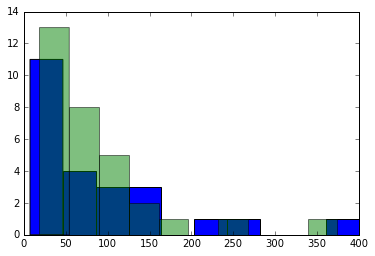

In [20]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
plt.hist(tempos_A, bins=10)
plt.hist(tempos_B, bins=10, alpha=0.5)

______
## Teste de Hipóteses
#### Primeira Etapa

No contexto do problema criamos duas hipóteses:

$H_0: E(A) - E(B) = 0$, significando que a alteração da localização do projeto "Estação Meteorológica" não alterou o tempo médio de busca.

$H_1: E(A) - E(B)$ $\neq$ $0$, significando que a alteração da localização do projeto "Estação Meteorológica" alterou o tempo médio de busca, ou seja, alterou o desempenho do site.

_________
#### Segunda e Terceira Etapas

   Calculo da média:

* $E = E(X_A - X_B) = E(X_A) - E(X_B)$, que sob a hipótese nula vale zero.

Calculo da variância: já que o desvio padrão populacional das duas amostras é desconhecido, deve-se estimá-los.


In [21]:
media_A = 0
for valor_delta_t in dataframe_resumo[dataframe_resumo.versao=='A'].delta_t:
    media_A += valor_delta_t
media_A/=len(dataframe_resumo[dataframe_resumo.versao=='A'].delta_t)
print('Média A =',media_A)

Média A = 90.4628333333


In [22]:
media_B = 0
for valor_delta_t in dataframe_resumo[dataframe_resumo.versao=='B'].delta_t:
    media_B += valor_delta_t
media_B/=len(dataframe_resumo[dataframe_resumo.versao=='B'].delta_t)
print('Média B =',media_B)

Média B = 85.5325806452


In [23]:
variancia_A = 0
for var_A in dataframe_resumo[dataframe_resumo.versao=='A'].delta_t:
    variancia_A += (var_A - media_A)**2
variancia_A/=len(dataframe_resumo[dataframe_resumo.versao=='A'].delta_t)
print('Variância A =',variancia_A)

Variância A = 8732.61705056


In [24]:
variancia_B = 0
for var_B in dataframe_resumo[dataframe_resumo.versao=='B'].delta_t:
    variancia_B += (var_B - media_B)**2
variancia_B/=len(dataframe_resumo[dataframe_resumo.versao=='B'].delta_t)
print('Variância B =',variancia_B)

Variância B = 5792.12625089


Como as variâncias são valores estimados, a padronização de $X_A - X_B$ é feita pela distribuição-t.


Como a mudança na localização do projeto não implica dificuldades técnicas, assume-se que as duas variâncias são iguais.

Para calcular a variância da distribuição-t, utiliza-se a seguinte fórmula (encontrada no livro Magalhães e Lima, Teste de Hipótese com distribuições independentes com mesma variância desconhecida):
    
* $ S^2 = \frac{(nA - 1)S_A^2 + (nB - 1)S_B^2}{nA + nB - 2}$


$S$: desvio padrão estimado a ser utilizado no teste de hipótese

$nA$ e $nB$: tamanho das amostras A e B

$S_A$ e $S_B$: $DP$ estimado de A e B

In [25]:
nA = len(dataframe_resumo[dataframe_resumo.versao=='A'].delta_t)
nB = len(dataframe_resumo[dataframe_resumo.versao=='B'].delta_t)

S2 = ((nA - 1)*variancia_A + (nB - 1)*variancia_B)/(nA + nB - 2)

print('Variância =',S2)

Variância = 7068.18829603


Com isso, tem-se a distribuição-t definida por:

* $T = \frac{(X_Aobs - X_Bobs) - (E(A) - E(B))}{S \sqrt{\frac{1}{nA}+\frac{1}{nB}}}$, com grau de liberdade igual a $nA + nB - 2$.

Calculando o grau de liberdade:

In [26]:
grau_liberdade = nA + nB - 2
print('Grau de Liberdade =', grau_liberdade)

Grau de Liberdade = 53


______
#### Quarta Etapa

Para definir a região crítica, definimos um $\alpha = 5$% e arredondamos o grau de liberdade para 50, já que não encontramos os valores correspondentes ao grau de liberdade 53 em nenhuma tabela.


Com isso, o t-crítico = 2,009

Para calcular o t_obs, utilizamos a fórmula encontrada a cima.

In [23]:
T_obs = ((media_A - media_B) - 0)/(math.sqrt(S2)*math.sqrt((1/nA)+(1/nB)))

print('T observado =',T_obs)

T observado = 0.215685150747


In [24]:
t_critico = 2.009
if -t_critico < T_obs < t_critico:
    print('H0 não pode ser rejeitado, com uma confiabilidade de 95%')
else:
    print('H0 deve ser rejeitado com uma confiabilidade de 95%')

H0 não pode ser rejeitado, com uma confiabilidade de 95%


______
##### Quinta Etapa

Calcula-se o valor-p para saber quais valores de $\alpha$ nos levam a rejeição ou não de $H_0$.

Pela tabela, arredondamos o valor de $Tobs$ para 0.255, assim achamos:

$Valor-p = 20$%

Assim, assim apenas para valores alpha superiores a 20% $H_0$ será rejeitada. Mas como a literatura estabelece $\alpha$ com limite máximo de 10%, nossa hipótese nula nunca será rejeitada.

______
### Conclusão

Não há indícios para se rejeitar $H_0$, ou seja, a alteração da localização do projeto "Estação Meteorológica" não altera o desempenho do site.